  


## **Introduction**  

This project focuses on **fault analysis and system performance evaluation** using Python. The dataset contains key variables such as **fault types, power load, voltage, current, environmental factors (temperature, wind speed, weather conditions), maintenance status, and component health**.  

The main objectives of this analysis are to:  
- **Identify fault trends** and understand which factors contribute to system failures.  
- **Analyze the impact of environmental conditions** (temperature, wind speed, weather) on power load and fault occurrences.  
- **Evaluate component health and maintenance status** to predict potential failures.  
- **Visualize fault patterns** using data-driven insights for better decision-making.  

Python libraries like **Pandas, Matplotlib, and Seaborn** were used for **data cleaning, exploratory analysis, and visualization** to uncover key insights.  

This project demonstrates how data analytics can improve **fault detection, predictive maintenance, and system reliability** in real-world applications.  





Loading the dataset

In [ ]:
import numpy as np #linear algebra
import pandas as pd #data processing

#Visualization modules
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
from matplotlib import cm #colormap

Loading Dataset

In [1]:
df_fault_data = pd.read_csv('C:/Users/maryo/Desktop/Data Analysis/Python Codes/Fault Analysis/fault_data.csv')

NameError: name 'pd' is not defined

Data Preparation

In [ ]:
df_fault_data.head()


In [ ]:
df_fault_data.info()

In [ ]:
df_fault_data.describe()

In [ ]:
print(df_fault_data.duplicated().sum())

0


Data Cleaning

In [ ]:
#Standardize Column Names
df_fault_data.columns = df_fault_data.columns.str.lower().str.replace(' ', '_')
df_fault_data['weather_condition'] = df_fault_data['weather_condition'].str.strip()
df_fault_data['maintenance_status'] = df_fault_data['maintenance_status'].str.strip()
df_fault_data['component_health'] = df_fault_data['component_health'].str.strip()

#Standardize Formatting Type
df_fault_data['fault_id'] = df_fault_data['fault_id'].astype('string')
df_fault_data['fault_type'] = df_fault_data['fault_type'].astype('string')
df_fault_data['fault_location_(latitude,_longitude)'] = df_fault_data['fault_location_(latitude,_longitude)'].astype('string')
df_fault_data['weather_condition'] = df_fault_data['weather_condition'].astype('string')
df_fault_data['maintenance_status'] = df_fault_data['maintenance_status'].astype('string')
df_fault_data['component_health'] = df_fault_data['component_health'].astype('string')


display(df_fault_data.head())


,fault_id,fault_type,"fault_location_(latitude,_longitude)",voltage_(v),current_(a),power_load_(mw),temperature_(°c),wind_speed_(km/h),weather_condition,maintenance_status,component_health,duration_of_fault_(hrs),down_time_(hrs),temperature_range
0,F001,Line Breakage,"(34.0522, -118.2437)",2200,250,50,25,20,Clear,Scheduled,Normal,2.0,1.0,20-30°C
1,F002,Transformer Failure,"(34.056, -118.245)",1800,180,45,28,15,Rainy,Completed,Faulty,3.0,5.0,20-30°C
2,F003,Overheating,"(34.0525, -118.244)",2100,230,55,35,25,Windstorm,Pending,Overheated,4.0,6.0,30-40°C
3,F004,Line Breakage,"(34.055, -118.242)",2050,240,48,23,10,Clear,Completed,Normal,2.5,3.0,20-30°C
4,F005,Transformer Failure,"(34.0545, -118.243)",1900,190,50,30,18,Snowy,Scheduled,Faulty,3.5,4.0,20-30°C


In [ ]:
# Check for duplicates in the 'Fault ID' column
duplicates = df_fault_data[df_fault_data.duplicated('fault_id', keep=False)]

# Display the duplicate rows (if any)
if not duplicates.empty:
    print("Duplicate Fault IDs found:")
    print(duplicates[['fault_id', 'fault_type', 'down_time_(hrs)']])
else:
    print("No duplicate Fault IDs found.")

No duplicate Fault IDs found.


Dealing with Outliers

In [ ]:
# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of numerical columns to clean
numerical_cols = ['voltage_(v)', 'current_(a)', 'power_load_(mw)', 'temperature_(°c)', 'wind_speed_(km/h)']


# Apply outlier removal
for col in numerical_cols:
    if col in df_fault_data.columns:
        df_fault_data = remove_outliers(df_fault_data, col)
    else:
        print(f"Warning: Column '{col}' not found in the dataset.")


# Check final shape
print(f"Dataset after outlier removal: {df_fault_data.shape}")
display(df_fault_data.head())
df_fault_data.head()

Dataset after outlier removal: (506, 14)


,fault_id,fault_type,"fault_location_(latitude,_longitude)",voltage_(v),current_(a),power_load_(mw),temperature_(°c),wind_speed_(km/h),weather_condition,maintenance_status,component_health,duration_of_fault_(hrs),down_time_(hrs),temperature_range
0,F001,Line Breakage,"(34.0522, -118.2437)",2200,250,50,25,20,Clear,Scheduled,Normal,2.0,1.0,20-30°C
1,F002,Transformer Failure,"(34.056, -118.245)",1800,180,45,28,15,Rainy,Completed,Faulty,3.0,5.0,20-30°C
2,F003,Overheating,"(34.0525, -118.244)",2100,230,55,35,25,Windstorm,Pending,Overheated,4.0,6.0,30-40°C
3,F004,Line Breakage,"(34.055, -118.242)",2050,240,48,23,10,Clear,Completed,Normal,2.5,3.0,20-30°C
4,F005,Transformer Failure,"(34.0545, -118.243)",1900,190,50,30,18,Snowy,Scheduled,Faulty,3.5,4.0,20-30°C


,fault_id,fault_type,"fault_location_(latitude,_longitude)",voltage_(v),current_(a),power_load_(mw),temperature_(°c),wind_speed_(km/h),weather_condition,maintenance_status,component_health,duration_of_fault_(hrs),down_time_(hrs),temperature_range
0,F001,Line Breakage,"(34.0522, -118.2437)",2200,250,50,25,20,Clear,Scheduled,Normal,2.0,1.0,20-30°C
1,F002,Transformer Failure,"(34.056, -118.245)",1800,180,45,28,15,Rainy,Completed,Faulty,3.0,5.0,20-30°C
2,F003,Overheating,"(34.0525, -118.244)",2100,230,55,35,25,Windstorm,Pending,Overheated,4.0,6.0,30-40°C
3,F004,Line Breakage,"(34.055, -118.242)",2050,240,48,23,10,Clear,Completed,Normal,2.5,3.0,20-30°C
4,F005,Transformer Failure,"(34.0545, -118.243)",1900,190,50,30,18,Snowy,Scheduled,Faulty,3.5,4.0,20-30°C


Data Analysis

. Identify the most common fault types

. Check if higher temperatures lead to increased load/failures

. See if high wind speeds during storms increase faults

. Component Health vs. Faults

. Identify the most severe faults requiring long recovery times





**Identify the most common fault types**

In [ ]:
# Count occurrences of each fault type
fault_counts = df_fault_data['fault_type'].value_counts()

# Display the most common fault types
display(fault_counts)
df_fault_data.head()

Visualizing the Output in a Bar Chart

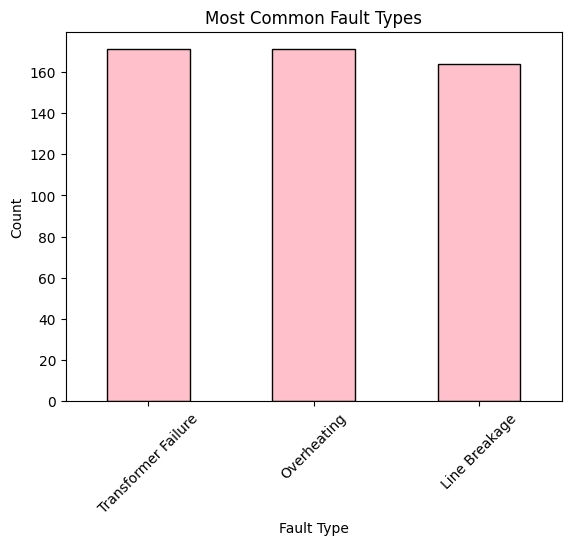

In [ ]:
# Plot a bar chart of fault types
fault_counts.plot(kind='bar', color='pink', edgecolor='black')
plt.title("Most Common Fault Types")
plt.xlabel("Fault Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Check if higher temperatures lead to increased load/failures**

In [ ]:
# Create temperature bins
df_fault_data['temperature_range'] = pd.cut(df_fault_data['temperature_(°c)'], bins=[0, 10, 20, 30, 40, 50], labels=['0-10°C','10-20°C', '20-30°C', '30-40°C', '40-50°C'])

# Calculate correlation matrix
correlation_matrix = df_fault_data[['temperature_(°c)', 'power_load_(mw)', 'duration_of_fault_(hrs)', 'down_time_(hrs)']].corr()
#df_fault_data.info()


# Display correlation value
print("Correlation between Temperature and Power Load:")
print(correlation_matrix)

Correlation between Temperature and Power Load:
                         temperature_(°c)  power_load_(mw)  \
temperature_(°c)                 1.000000         0.088662   
power_load_(mw)                  0.088662         1.000000   
duration_of_fault_(hrs)         -0.051422         0.064723   
down_time_(hrs)                  0.053460        -0.013752   

                         duration_of_fault_(hrs)  down_time_(hrs)  
temperature_(°c)                       -0.051422         0.053460  
power_load_(mw)                         0.064723        -0.013752  
duration_of_fault_(hrs)                 1.000000         0.018813  
down_time_(hrs)                         0.018813         1.000000  


Visualize the Correlation

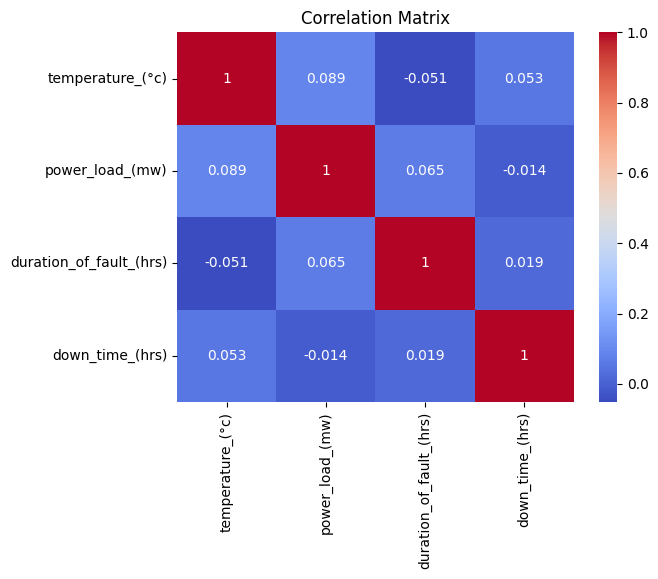

In [ ]:
# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# Compute correlation
#correlation = df_fault_data[['temperature_(°c)', 'power_load_(mw)']].corr()

Aggregate data by temperature ranges to see trend

In [ ]:
# Group by temperature ranges and calculate averages
temperature_analysis = df_fault_data.groupby('temperature_range').agg({
    'power_load_(mw)': 'mean',
    'fault_id': 'count',  # Number of faults
    'down_time_(hrs)': 'sum'
}).reset_index()

print(temperature_analysis)

Visualize Trends

In [ ]:
# Plot power load vs temperature
plt.figure(figsize=(10, 6))
sns.barplot(x='temperature_range', y='power_load_(mw)', data=temperature_analysis)
plt.title('Average Power Load by Temperature Range')
plt.xlabel('Temperature Range')
plt.ylabel('Average Power Load (MW)')
plt.show()

# Plot number of faults vs temperature
plt.figure(figsize=(10, 6))
sns.barplot(x='temperature_range', y='fault_id', data=temperature_analysis)
plt.title('Number of Faults by Temperature Range')
plt.xlabel('Temperature Range')
plt.ylabel('Number of Faults')
plt.show()

# Plot total downtime vs temperature
plt.figure(figsize=(10, 6))
sns.barplot(x='temperature_range', y='down_time_(hrs)', data=temperature_analysis)
plt.title('Total Downtime by Temperature Range')
plt.xlabel('Temperature Range')
plt.ylabel('Total Downtime (hrs)')
plt.show()

**See if high wind speeds during storms increase faults**

In [ ]:

# Define stormy weather conditions
storm_conditions = ['Windstorm', 'Thunderstorm', 'Heavy Rain', 'Snowstorm']

# Create a new column to classify stormy vs. non-stormy weather
df_fault_data['Stormy'] = df_fault_data['weather_condition'].isin(storm_conditions)

# Group fault counts by wind speed and stormy condition
fault_counts = df_fault_data.groupby(['wind_speed_(km/h)', 'Stormy'])['fault_id'].count().unstack()

# Fill NaN values with 0
fault_counts = fault_counts.fillna(0)

# Display the grouped fault counts
fault_counts



Stormy,False,True
wind_speed_(km/h),,
10,14,9
11,11,9
12,9,4
13,23,14
14,25,4
15,23,8
16,13,12
17,16,5
18,17,14


Visualization

In [ ]:


# Extract data for plotting
wind_speeds = fault_counts.index
stormy_faults = fault_counts[True]
non_stormy_faults = fault_counts[False]

# Set bar width and positions
bar_width = 0.4
x = np.arange(len(wind_speeds))

# Create clustered bar chart
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width/2, stormy_faults, bar_width, label='Stormy Weather', color='red', alpha=0.7)
plt.bar(x + bar_width/2, non_stormy_faults, bar_width, label='Non-Stormy Weather', color='blue', alpha=0.7)

# Formatting the plot
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Number of Faults")
plt.title("Faults at Different Wind Speeds (Stormy vs. Non-Stormy)")
plt.xticks(ticks=x, labels=wind_speeds, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [ ]:
# Convert 'Fault ID' count to numeric for correlation calculation
df_fault_data['fault_count'] = df_fault_data.groupby('wind_speed_(km/h)')['fault_id'].transform('count')

# Compute correlation between wind speed and number of faults
correlation = df_fault_data[['wind_speed_(km/h)', 'fault_count']].corr()

# Display correlation result
correlation


**Identify the most severe faults requiring long recovery times**

In [ ]:
# Calculate the 90th percentile for downtime and duration
downtime_threshold = df_fault_data['down_time_(hrs)'].quantile(0.9)
duration_threshold = df_fault_data['duration_of_fault_(hrs)'].quantile(0.9)

# Filter severe faults
severe_faults = df_fault_data[(df_fault_data['down_time_(hrs)'] >= downtime_threshold) | (df_fault_data['duration_of_fault_(hrs)'] >= duration_threshold)]
print(severe_faults)

Check which fault types are most common among severe faults

In [ ]:
severe_fault_type_distribution = severe_faults['fault_type'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=severe_fault_type_distribution.index, y=severe_fault_type_distribution.values)
plt.title('Severe Faults by Fault Type')
plt.xlabel('Fault Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



NameError: name 'severe_faults' is not defined

Check the relationship between downtime and fault duration

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_of_fault_(hrs)', y='down_time_(hrs)', data=severe_faults, hue='fault_type')
plt.title('Downtime vs. Fault Duration for Severe Faults')
plt.xlabel('Fault Duration (hrs)')
plt.ylabel('Downtime (hrs)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

NameError: name 'severe_faults' is not defined

<Figure size 1000x600 with 0 Axes>

**Component Health vs. Faults**

C:\Users\maryo\AppData\Local\Temp\ipykernel_13800\2351691332.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=health_analysis.index, y=health_analysis.values, palette="magma")


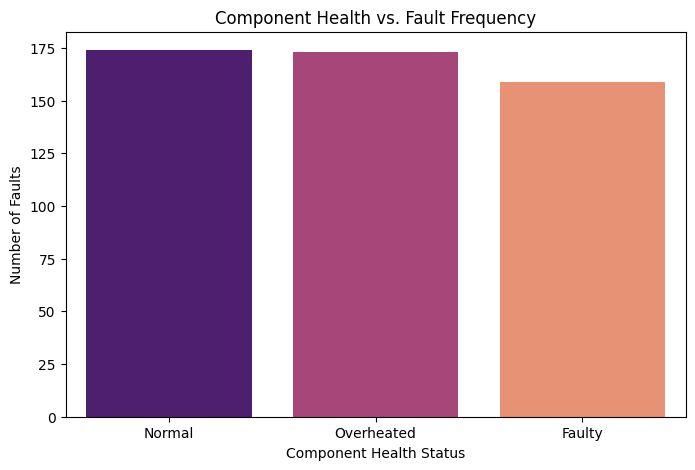

In [ ]:
# Count faults based on component health
health_analysis = df_fault_data["component_health"].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=health_analysis.index, y=health_analysis.values, palette="magma")
plt.xlabel("Component Health Status")
plt.ylabel("Number of Faults")
plt.title("Component Health vs. Fault Frequency")
plt.show()

**Conclusion**

This project explored fault analysis using Python to identify key failure patterns and system performance trends. 


The findings revealed that transformer failures and overheating were the most common fault types, indicating potential areas for preventive maintenance.


A correlation analysis between temperature and power load showed a weak relationship (0.0886), suggesting that while temperature variations exist, they may not be the primary driver of increased load or failures. However, further investigation into weather conditions, such as high wind speeds during storms, is needed to determine their impact on system faults.


Additionally, an assessment of component health and fault occurrences highlighted that poor component conditions are often linked to failures, reinforcing the importance of regular maintenance. Finally, faults with the longest recovery times were identified, providing insights into which failures cause significant downtime and require optimized repair strategies.


Overall, this analysis helps improve fault detection, preventive maintenance, and system reliability, ensuring better operational efficiency.